**Cocacola Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata (1).xlsx to CocaCola_Sales_Rawdata (1).xlsx


In [3]:
df=pd.read_excel('CocaCola_Sales_Rawdata (1).xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
df.columns

Index(['Quarter', 'Sales'], dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum().sum()

0

In [9]:
df.shape

(42, 2)

In [10]:
quarter = []
for i in range (0, len(df)):
    if 'Q1' in df.Quarter[i]:
        quarter.append('Q1')
    elif 'Q2' in df.Quarter[i]:
        quarter.append('Q2')
    elif 'Q3' in df.Quarter[i]:
        quarter.append('Q3')
    elif 'Q4' in df.Quarter[i]:
        quarter.append('Q4') 
        
df['quarter'] = quarter 
year = []

for i in range (0, len(df)):
    year.append(int(df.Quarter[i].replace(df.Quarter[i][:3], ''))) 
    
df['year'] = year 
df.drop('Quarter', axis=1, inplace=True)
df['log_sales'] = np.log(df.Sales)
df['t'] = np.arange(1,len(df)+1) 
df['t_squared'] = df.t * df.t 
df1 = df[['t', 't_squared', 'quarter', 'year', 'Sales', 'log_sales']] 
df1 = pd.get_dummies(df1) 
df1.head()

,t,t_squared,year,Sales,log_sales,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
0,1,1,86,1734.827000,7.458663,1,0,0,0
1,2,4,86,2244.960999,7.716443,0,1,0,0
2,3,9,86,2533.804993,7.837477,0,0,1,0
3,4,16,86,2154.962997,7.675529,0,0,0,1
4,5,25,87,1547.818996,7.344602,1,0,0,0


<Axes: >

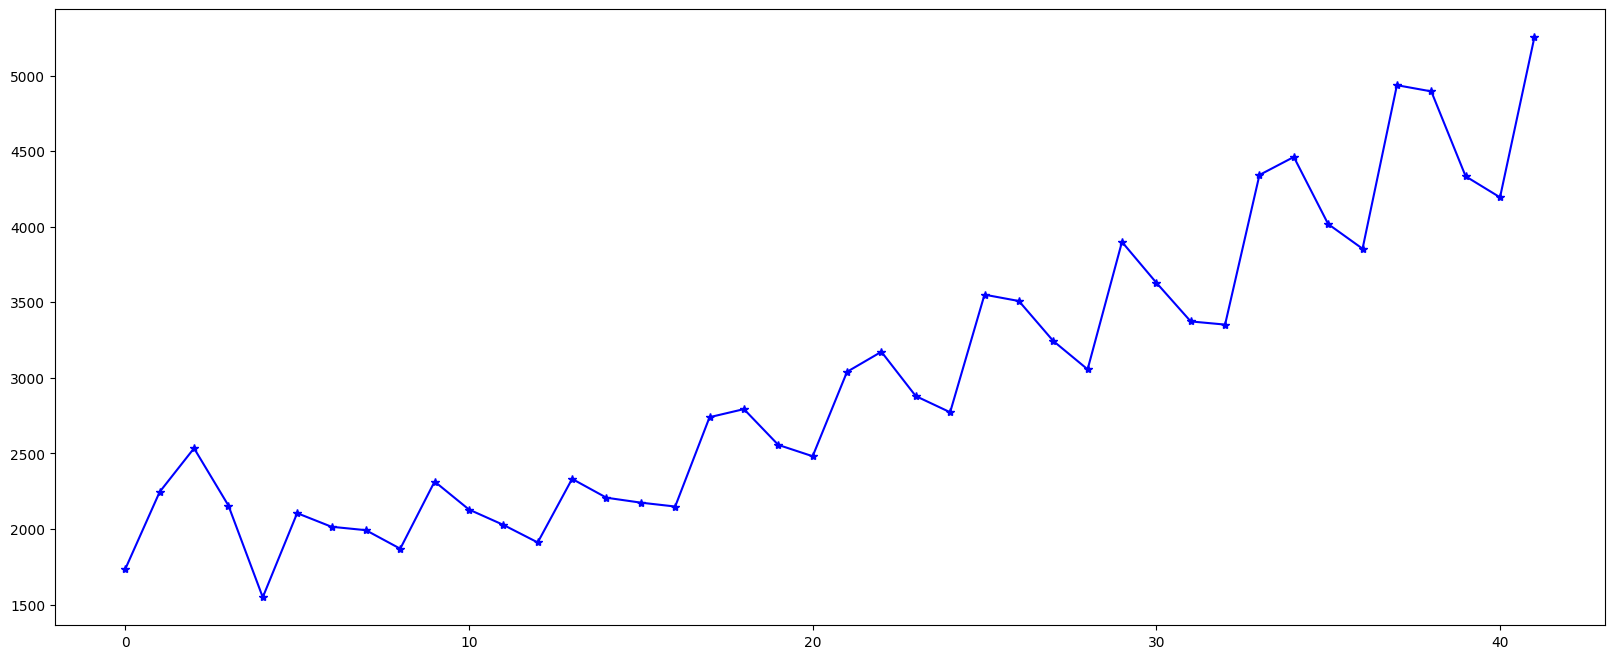

In [11]:
df1.Sales.plot(figsize=(20, 8),color='blue',marker='*') 

There is an increasing trend in sales

<Axes: xlabel='year', ylabel='Sales'>

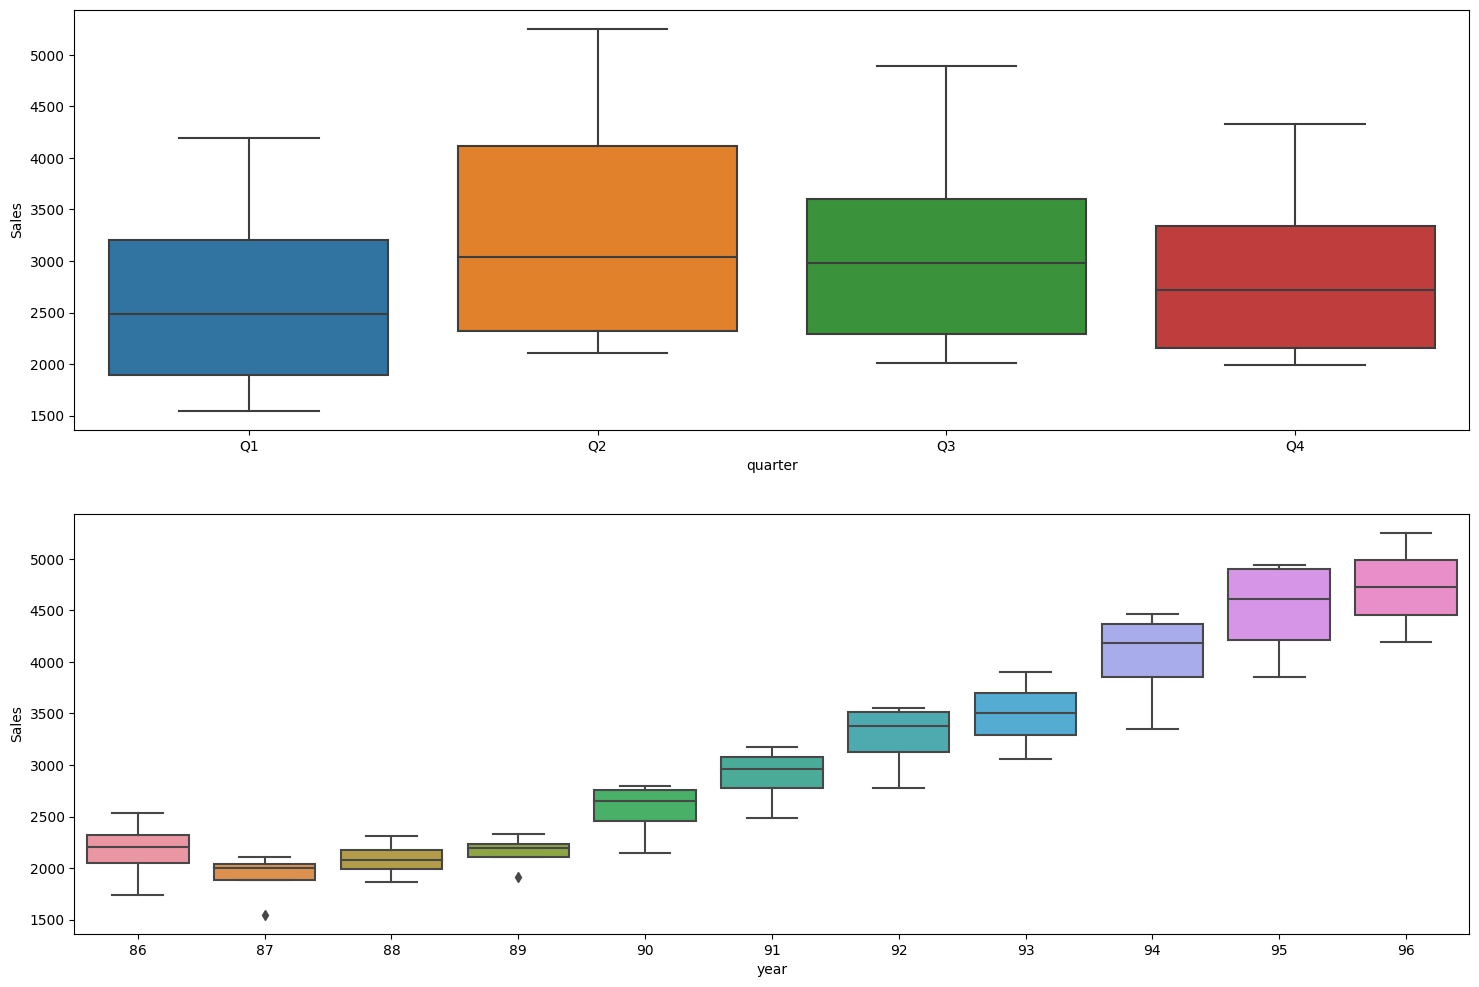

In [12]:
plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
sns.boxplot(x="quarter", y="Sales",data=df)
plt.subplot(2,1,2)
sns.boxplot(x="year", y="Sales",data=df)

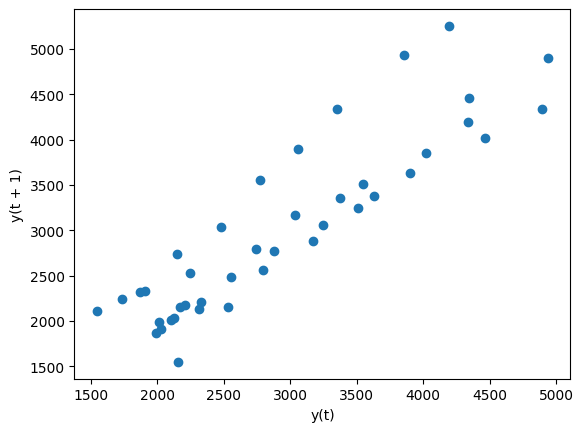

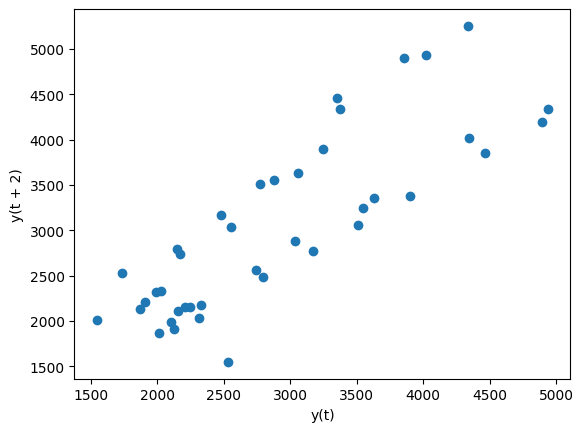

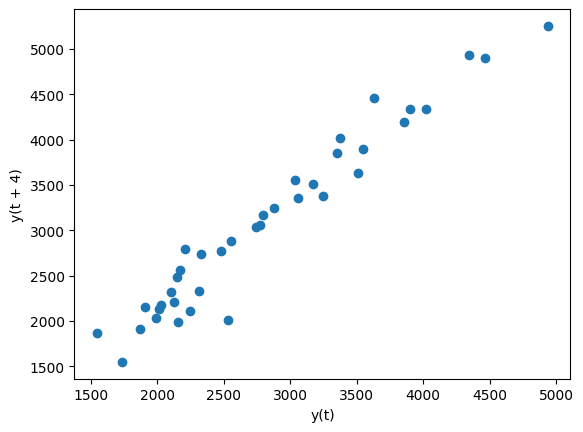

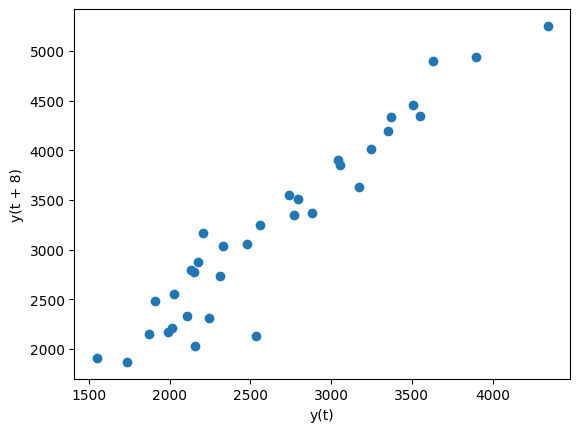

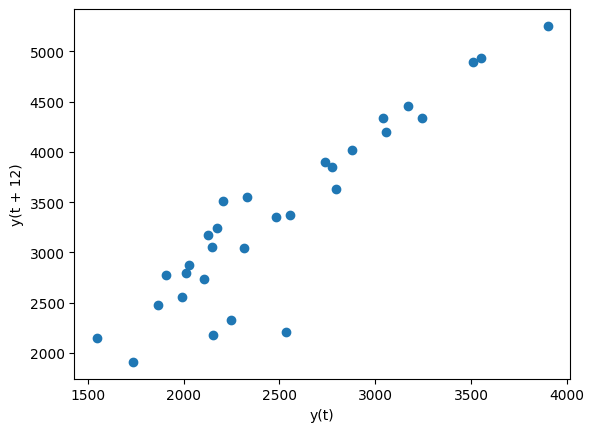

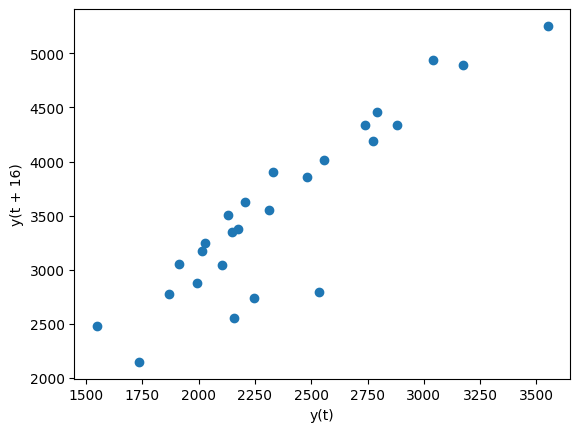

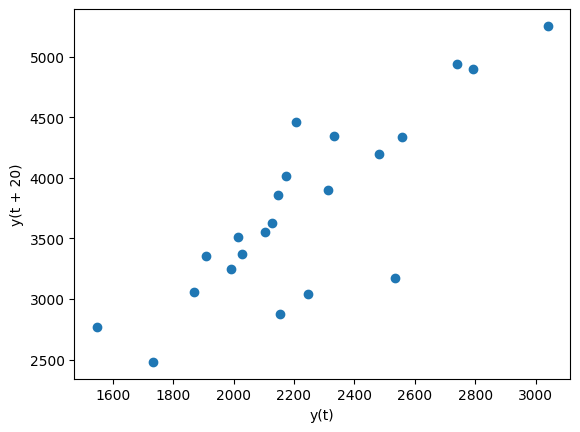

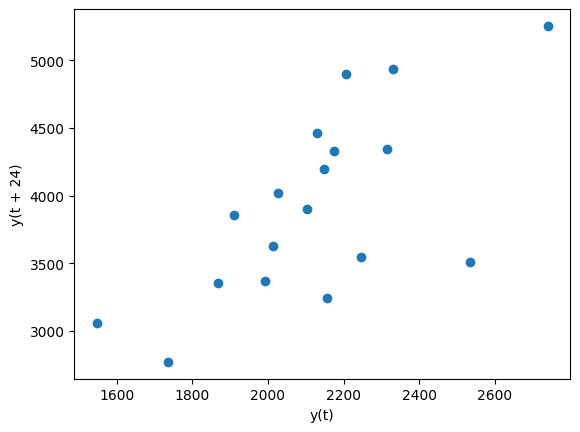

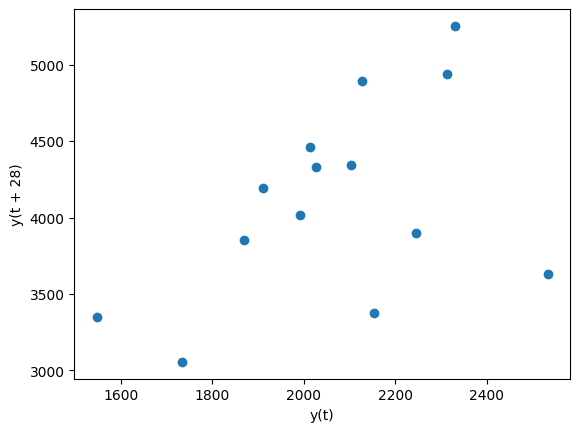

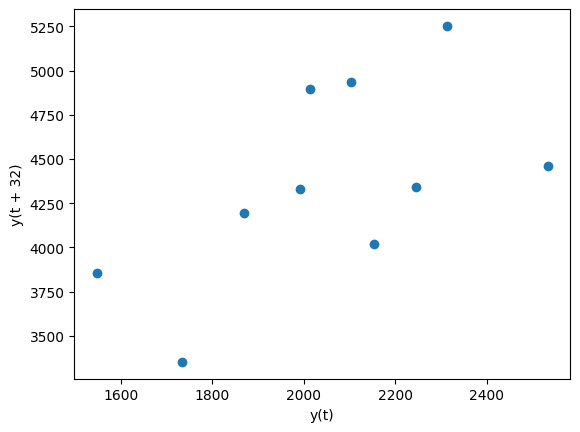

In [13]:
from pandas.plotting import lag_plot

for i in [1, 2, 4, 8, 12, 16, 20, 24, 28, 32]:
    lag_plot(df1.Sales, lag=i)
    plt.show() 

Moving Average

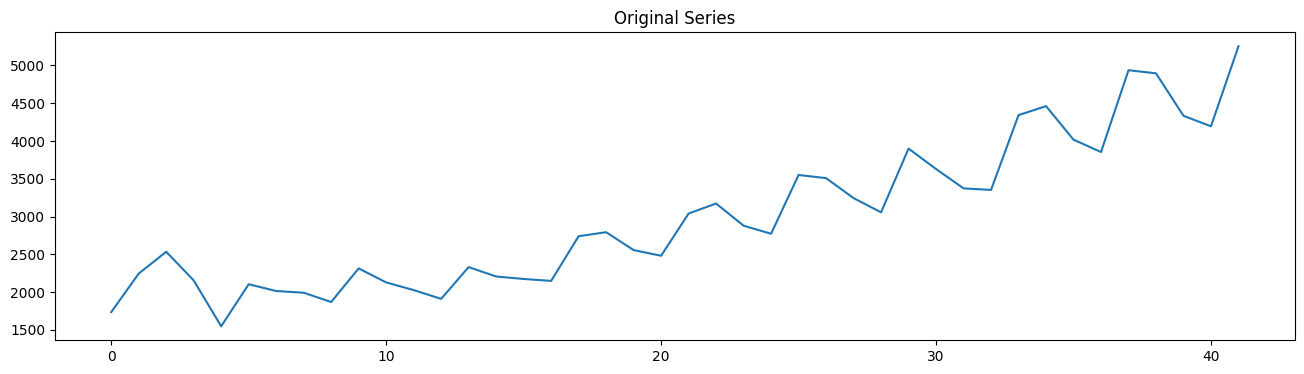

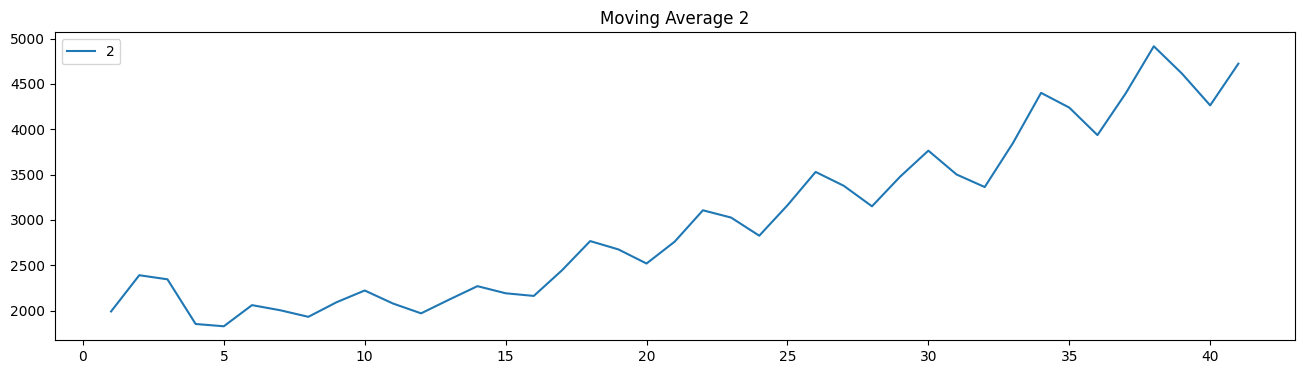

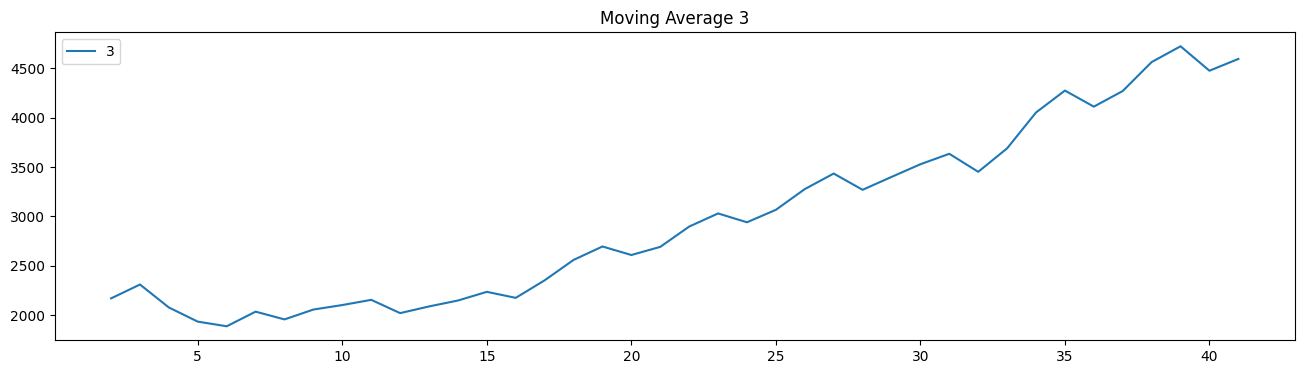

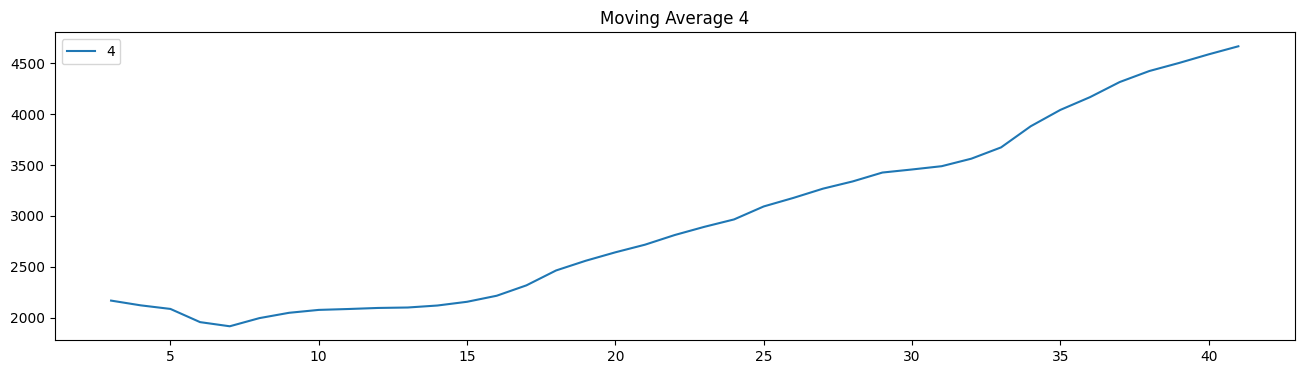

In [14]:
plt.figure(figsize=(16,4))
df.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,5):
    plt.figure(figsize=(16,4))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show() 

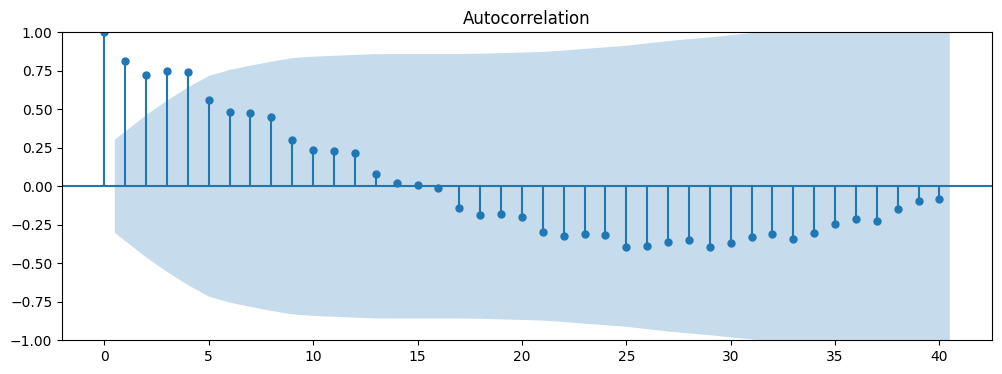

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
plt.rc("figure", figsize=(12,4)) 
tsa_plots.plot_acf(df.Sales,lags=40)
plt.show()

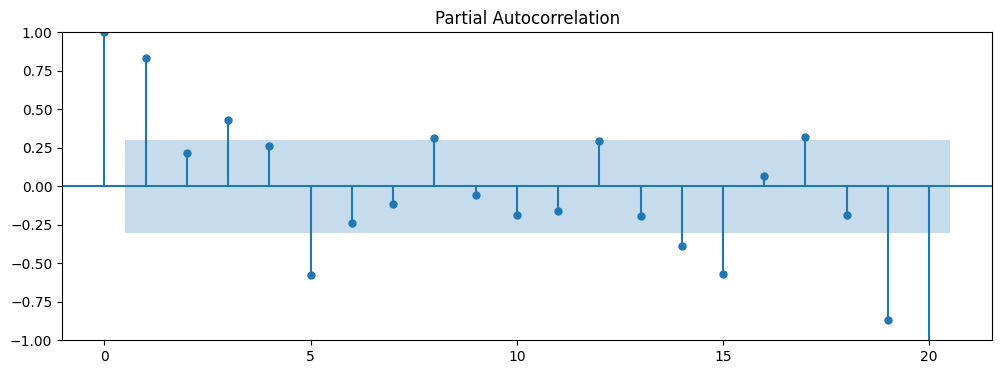

In [16]:
plt.rc("figure", figsize=(12,4))
tsa_plots.plot_pacf(df.Sales,lags=20)
plt.show()

In [17]:
Train = df1.head(32)
Test = df1.tail(10) 

Linear Model

In [18]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767116

Exponential

In [19]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432076487

Quadratic

In [20]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.735735540752

Additive Seasonality

In [ ]:
add_sea = smf.ols('Sales ~ quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[[ 'quarter_Q1' ,'quarter_Q2','quarter_Q3', 'quarter_Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1850.466546185835

Additive Seasonality Quadratic

In [ ]:
add_sea_Quad = smf.ols('Sales~t+t_squared+quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

277.35107711285275

Multiplicative Seasonality

In [ ]:
Mul_sea = smf.ols('log_sales~quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836114

Multiplicative Additive Seasonality

In [ ]:
Mul_Add_sea = smf.ols('log_sales~t+quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.86781826918656

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])  

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_Quad,457.735736
1,rmse_Exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


Data Driven Models

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import math  
import sklearn.metrics 

In [ ]:
def rmse(actual, pred):
    mse = sklearn.metrics.mean_squared_error(actual, pred)  
    rmse = math.sqrt(mse)
    return rmse 

Simple Exponential Method

In [ ]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = rmse(Test.Sales, pred_ses) 
rmse_ses

1172.1756106651035

Holt Method

In [ ]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = rmse(Test.Sales, pred_hw) 
rmse_hw 

888.7798848976819

Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = rmse(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add

633.4394050169811

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_mul_add =rmse(Test.Sales, pred_hwe_mul_add) 
rmse_mul_add

568.1679856842486

In [ ]:
data = {"MODEL":pd.Series(["linear","Exp","Quad","add_sea","add_sea_quad","Mult_sea","Mult_add_sea",'ses_model', 'hw_model', 'hwe_model_add_add', 'hwe_model_mul_add']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea, rmse_ses, rmse_hw,rmse_hwe_add_add,rmse_mul_add  ])}
table_rmse=pd.DataFrame(data)
table_rmse = table_rmse.sort_values(by=['RMSE_Values']) 
table_rmse 

,MODEL,RMSE_Values
4,add_sea_quad,277.351077
6,Mult_add_sea,448.867818
2,Quad,457.735736
10,hwe_model_mul_add,568.167986
1,Exp,590.331643
9,hwe_model_add_add,633.439405
0,linear,752.923393
8,hw_model,888.779885
7,ses_model,1172.175611
3,add_sea,1850.466546


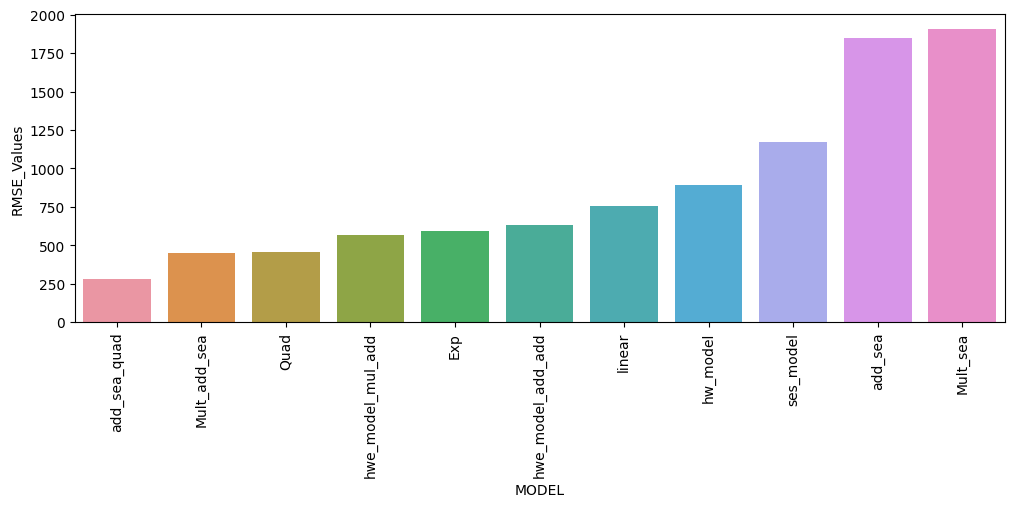

In [ ]:
sns.barplot(x="MODEL" ,y="RMSE_Values",data= table_rmse)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
add_sea_Quad = smf.ols('Sales~t+t_squared+quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data=df1).fit()
pred= add_sea_Quad.predict(df1.tail()) #predicting on historic data
forecast_df = pd.DataFrame()

forecast_df['actual_sales'] = df1.Sales.tail()
forecast_df['Predicted_sales'] = pred 

forecast_df 

,actual_sales,Predicted_sales
37,4936.0,4705.724784
38,4895.0,4753.588072
39,4333.0,4557.724974
40,4194.0,4475.373006
41,5253.0,5257.826846


In [ ]:
new_df = pd.DataFrame() 
new_df['t'] = np.arange(43,50,1) 
new_df['t_squared'] = np.square(new_df.t)
new_df['quarter'] = ['Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4', 'Q1'] 
new_df = pd.get_dummies(new_df)
new_df 

,t,t_squared,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
0,43,1849,0,0,1,0
1,44,1936,0,0,0,1
2,45,2025,1,0,0,0
3,46,2116,0,1,0,0
4,47,2209,0,0,1,0
5,48,2304,0,0,0,1
6,49,2401,1,0,0,0


In [ ]:
add_sea_Quad = smf.ols('Sales~t+t_squared+quarter_Q1 + quarter_Q2+ quarter_Q3+ quarter_Q4',data=df1).fit()
pred= add_sea_Quad.predict(new_df)  

new_df['forcasted'] = pred

new_df 

,t,t_squared,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,forcasted
0,43,1849,0,0,1,0,5319.754557
1,44,1936,0,0,0,1,5137.955882
2,45,2025,1,0,0,0,5069.668337
3,46,2116,0,1,0,0,5866.186600
4,47,2209,0,0,1,0,5942.178733
5,48,2304,0,0,0,1,5774.444481
6,49,2401,1,0,0,0,5720.221359


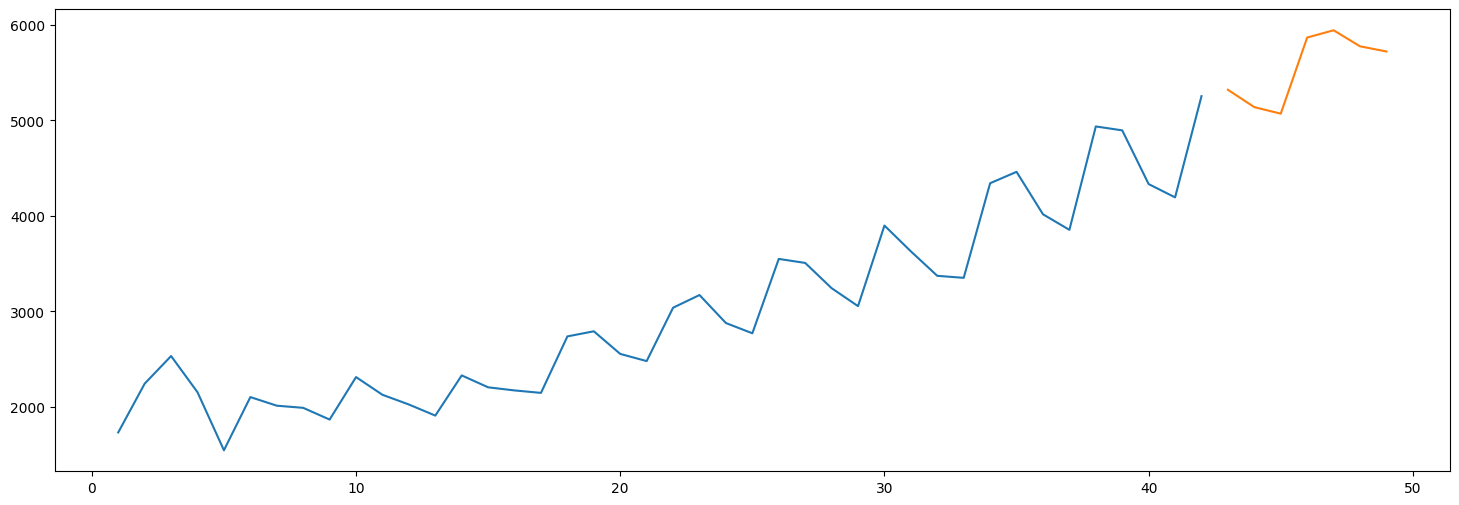

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(df1.t , df1.Sales)
plt.plot(new_df.t , new_df.forcasted)